**Вариант 4, 5, 6** (задание из варианта 5, первый график из варианта 4, второй из 5, третий из 6)  
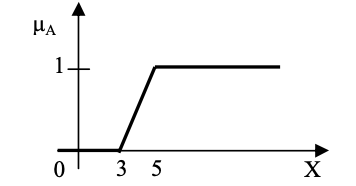

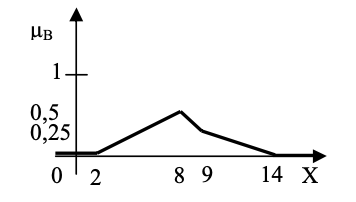
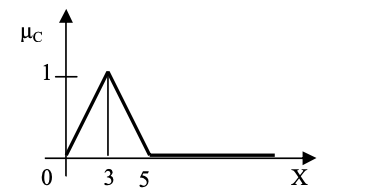

Дано 3 нечетких множества A, B, C (заданы их функции принадлежности). Построить функцию принадлежности нечеткого
множества D = A ∪ B ∩ C и определить степень принадлежности одного
элемента множеству D, используя алгебраический способ.


Описание процесса решения. Для построения функции принадлежности нового множества необходимо:  
1) Определить последовательность выполнения операций в формуле.  
2) Построить на отдельных графиках промежуточные множества,
согласно определенной последовательности действий. Свести промежуточные множества на одном графике и определить итоговую функцию принадлежности.  
3) Используя определенный в задаче метод, определить аналитически степень принадлежности элемента, входящего в ядро итогового множества.  
4) Проверить аналитические вычисления по построенному графику функции принадлежности.  

In [ ]:
!pip install fuzzywuzzy
!pip install scikit-fuzzy

Text(1, 0.9, 'μc')

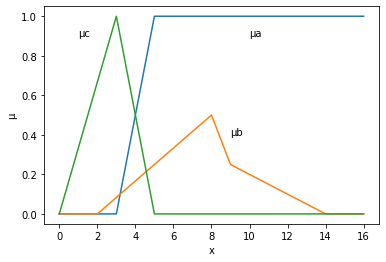

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def μa(x):
    if x>=0 and x<=3:
      return 0
    if x>3 and x<=5:
      return (x-3)/2
    if x>=5:
      return 1

  
def μb(x):
  if x >= 0 and x <= 2:
    return 0
  if x > 2 and x <= 8:
    return (x - 2) / 12
  if x > 8 and x <= 9:
    return (-x + 10) / 4
  if x > 9 and x <= 14:
    return (-x + 14) / 20
  if x > 14:
    return 0

def μc(x):
  if x>=0 and x<=3:
    return x/3
  if x>3 and x<=5:
    return (5-x)/2
  if x>5:
    return 0

a = [μa(i) for i in np.linspace(0, 16, 17)]
b = [μb(i) for i in np.linspace(0, 16, 17)]
c = [μc(i) for i in np.linspace(0, 16, 17)]

plt.plot(np.linspace(0, 16, 17), a)
plt.plot(np.linspace(0, 16, 17), b)
plt.plot(np.linspace(0, 16, 17), c)
plt.xlabel("x")
plt.ylabel("μ")

plt.text(10, 0.9, "μa")
plt.text(9, 0.4, "μb")
plt.text(1, 0.9, "μc")

1) Определить последовательность выполнения операций в формуле.
Последовательность:
1. !B
2. A ∪ !B
3. (A ∪ !B)∩ С

Text(0, 0.5, 'mu_!B')

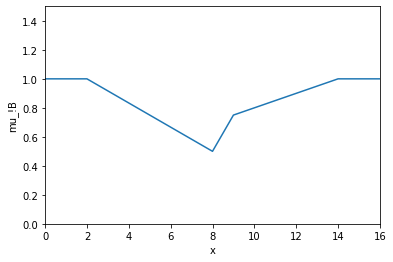

In [53]:
def minus(a):
  return 1 - a

res1 = []

for i in range(17):
  res1.append(minus(b[i]))

plt.plot(np.linspace(0, 16, 17), res1)
plt.xlim(0, 16), plt.ylim(0, 1.5)
plt.xlabel("x")
plt.ylabel("mu_!B")

Text(0, 0.5, 'mu_(A ∪ !B)')

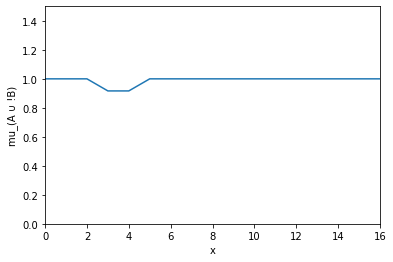

In [54]:
res2 = []

for i in range(17):
  res2.append(a[i]+res1[i]-a[i]*res1[i])

plt.plot(np.linspace(0, 16, 17), res2)
plt.xlim(0, 16), plt.ylim(0, 1.5)
plt.xlabel("x")
plt.ylabel("mu_(A ∪ !B)")

Text(0, 0.5, 'mu_(A ∪ !B ∩ С)')

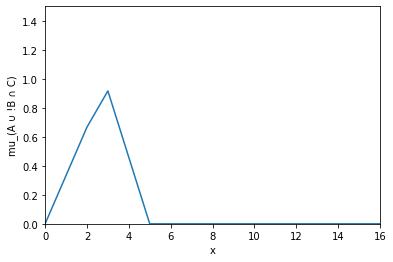

In [55]:
res3 = []

for i in range(17):
  res3.append(res2[i]*c[i])

plt.plot(np.linspace(0, 16, 17), res3)
plt.xlim(0, 16), plt.ylim(0, 1.5)
plt.xlabel("x")
plt.ylabel("mu_(A ∪ !B ∩ С)")

Ядро множества D состоит из элементов из интервала (0,14). Выберем элемент 2.

0.6666666666666666


Text(0, 0.5, 'mu_(A ∪ !B ∩ С)')

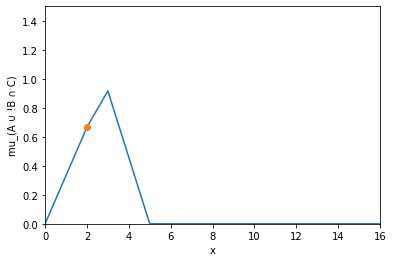

In [60]:
point = 2
point_mu_a = μa(point)
point_mu_b = μb(point)
point_mu_c = μc(point)

point_res1 = res1[point]
point_res2 = point_mu_a + point_res1 - point_mu_a*point_res1
point_res3 = point_res2*point_mu_c

print(point_res3)

plt.plot(np.linspace(0, 16, 17), res3)
plt.plot([point], [point_res3], marker = 'o')
plt.xlim(0, 16), plt.ylim(0, 1.5)
plt.xlabel("x")
plt.ylabel("mu_(A ∪ !B ∩ С)")